In [4]:
from pathlib import Path as pt
import umap
import pandas as pd
import numpy as np
import umap
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
from typing import List
import warnings
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

# from tqdm.notebook import tqdm as tqdm_notebook

warnings.filterwarnings('ignore')
tqdm.pandas()

In [7]:
from load_data import embedded_vectors_dir, names, titles
names

['tmpC_topelements',
 'tbp_topelements',
 'vp_kPa_25C_topelements',
 'Pc_MPa',
 'Tc_K']

In [12]:
ind = 1
print(titles[ind])
umap_df = pd.read_parquet(
    embedded_vectors_dir[ind] / f'processed_mol2vec_embeddings/umap/cleaned_label_issues_xgboost/[umap_df]_{names[ind]}_scaled_random_state_42_umap_25_0.3_2_cluster_eps_0.7_min_samples_15.parquet'
)
print(umap_df['Cluster'].unique(), umap_df['Cluster'].value_counts())
umap_df

BP
[ 0  1  2  3  4  5  6 -1] Cluster
 1    2524
 2    1205
 3     473
 0     404
 6      79
 4      71
 5      57
-1       3
Name: count, dtype: int64


,INDEX,UMAP1,UMAP2,Cluster,SMILES,y
0,2,11.624358,4.971106,0,c1cc2c3c(cccc3c1)CC2,277.50
1,3,11.661141,4.843860,0,C1=Cc2cccc3cccc1c23,280.00
2,4,-2.965826,2.672788,1,CC=O,20.80
3,5,-2.915324,2.345770,1,CC=NO,115.24
4,6,-3.820509,1.696369,1,CC(N)=O,222.00
...,...,...,...,...,...,...
4811,4987,11.972965,-1.710738,2,Cc1cccc(C)c1O,201.03
4812,4988,12.037120,-1.625613,2,Cc1ccc(O)cc1C,227.31
4813,4989,12.031575,-1.626928,2,Cc1cc(C)cc(O)c1,221.71
4814,4990,-7.045243,0.039811,1,OCC(O)C(O)C(O)CO,380.00


<Figure size 640x480 with 0 Axes>

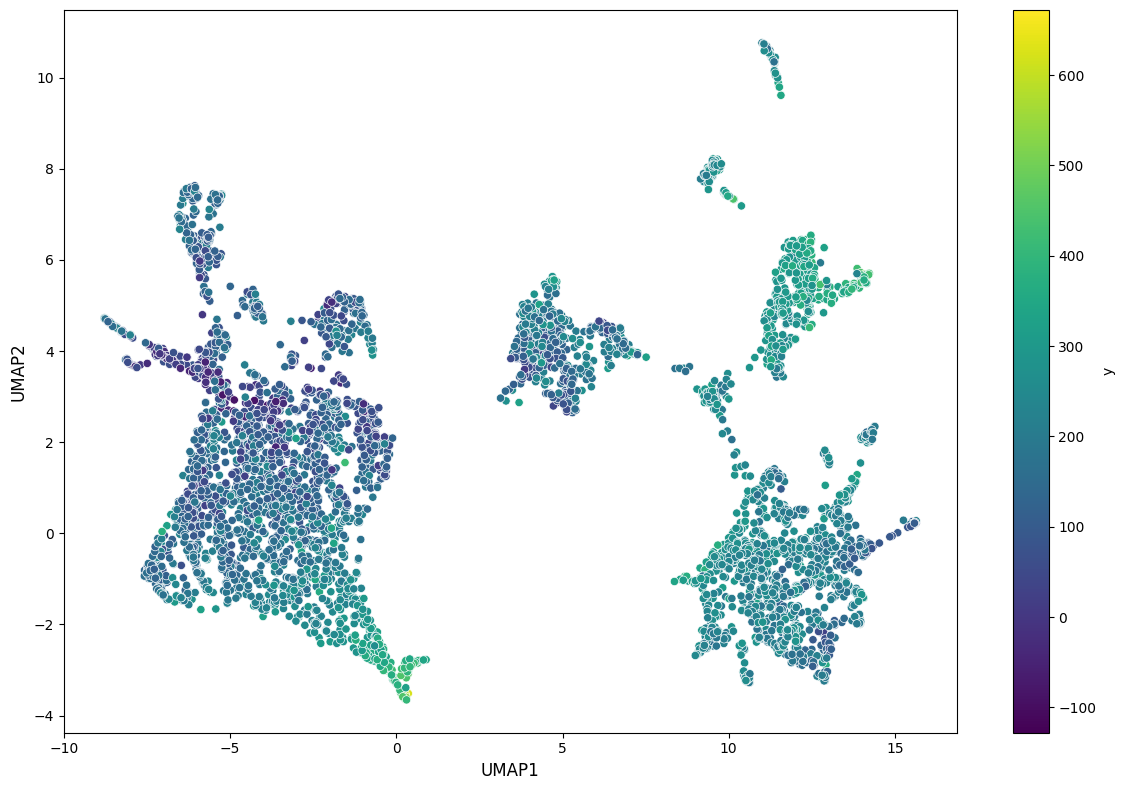

In [10]:
plt.clf()
fig, ax = plt.subplots(figsize=(12, 8))

# Create the scatter plot using seaborn
scatter = sns.scatterplot(
    data=umap_df,
    x="UMAP1",
    y="UMAP2",
    hue="y",
    palette="viridis",
    # s=point_size,
    # alpha=alpha,
    ax=ax,
)

# Remove the automatic legend
scatter.legend_.remove()

# Create and customize the colorbar
norm = plt.Normalize(umap_df["y"].min(), umap_df["y"].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
colorbar = fig.colorbar(sm, ax=ax)
colorbar.set_label('y')

ax.set_xlabel("UMAP1", fontsize=12)
ax.set_ylabel("UMAP2", fontsize=12)

plt.tight_layout()
plt.show()

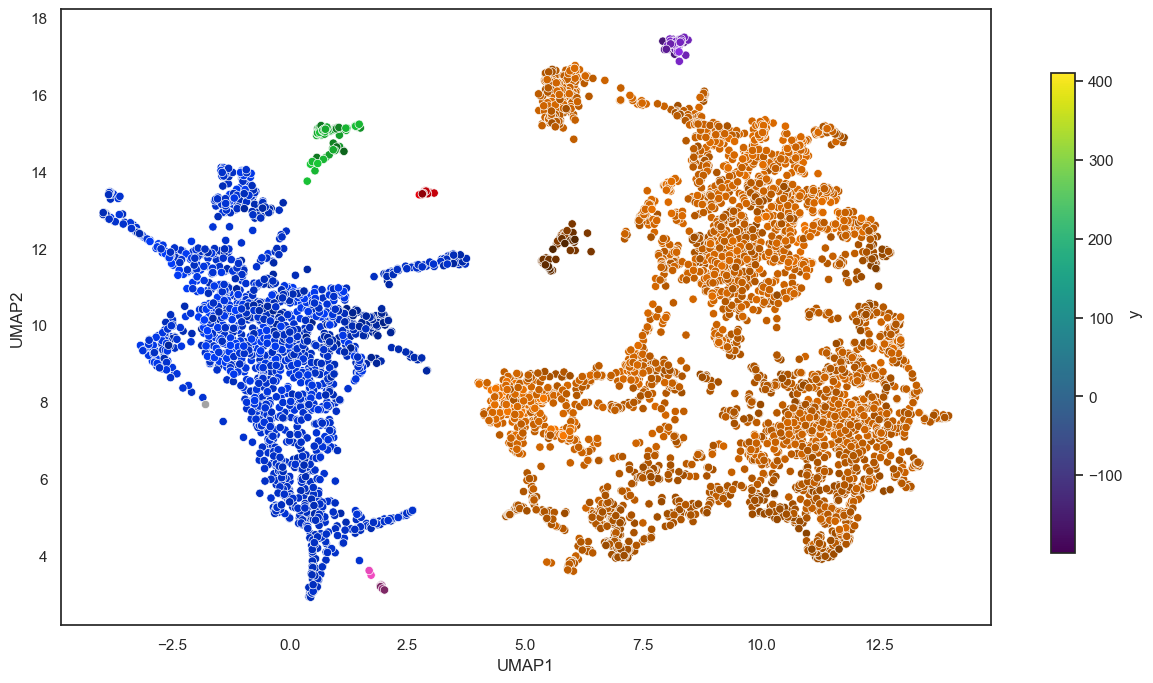

In [24]:
# plot UMAP using seaborn
# palette = sns.color_palette("bright", len(umap_df['Cluster'].unique()))
# sns.scatterplot(x='UMAP1', y='UMAP2', hue='Cluster', legend='full', palette=palette, data=umap_df)

cluster_cmaps = {}
for cluster_id in umap_df['Cluster'].unique():
    # Generate a colormap based on the cluster's assigned color
    base_color = sns.color_palette("bright", len(umap_df['Cluster'].unique()))[cluster_id]
    cluster_cmaps[cluster_id] = mcolors.LinearSegmentedColormap.from_list(
        f"cluster_{cluster_id}_cmap", [base_color, tuple(0.5 * c for c in base_color)]
    )

# Create the scatter plot with individual colormaps for each cluster
plt.figure(figsize=(12, 8))
for cluster_id, cmap in cluster_cmaps.items():
    cluster_data = umap_df[umap_df['Cluster'] == cluster_id]
    sns.scatterplot(
        x='UMAP1',
        y='UMAP2',
        hue='y',
        palette=cmap,
        data=cluster_data,
        legend=False,
    )
    
# Create the colorbar
# Get the current axes
ax = plt.gca()

# Create a new axes for the colorbar
cax = plt.axes([0.95, 0.2, 0.02, 0.6])  # Adjust position and size as needed

# Create a colorbar based on the 'y' property
vmin = umap_df['y'].min()
vmax = umap_df['y'].max()
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])  # This line is necessary for the colorbar to work properly
cbar = plt.colorbar(sm, cax=cax)
cbar.set_label('y')

plt.show()
